In [1]:
from keras.models import load_model

/home/tony/anaconda3/envs/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
HOLDOUT=6
model = load_model("cnn_3d_64_64_3_HOLDOUT6_20180226_130202.hdf5")

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3, 1) 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 32, 32, 2, 64 22016       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 2, 64 256         conv3d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 2, 64 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

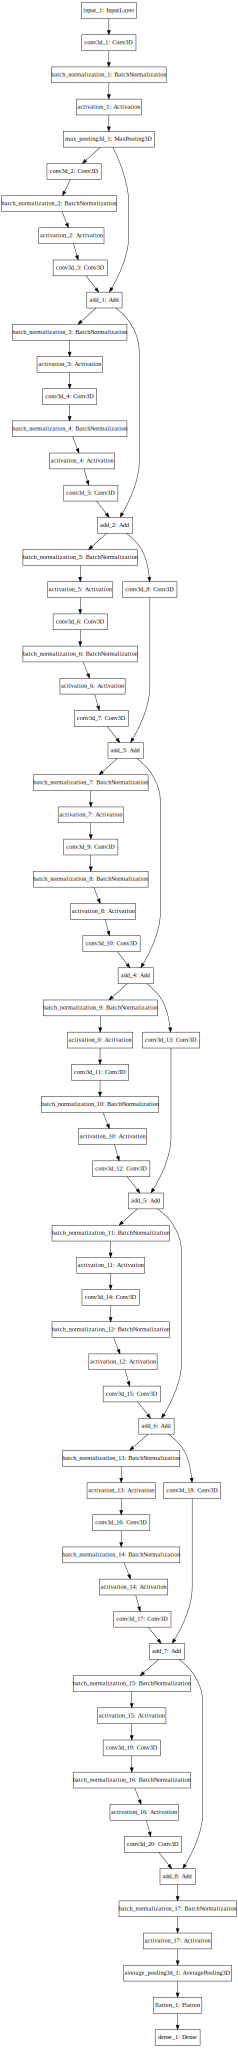

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [5]:
dot1 = model_to_dot(model).create(prog='dot', format='svg')

In [6]:
import h5py
import numpy as np

In [7]:
df = h5py.File("64x64x3-patch.hdf5", "r")

In [8]:
idx_subset = np.where(df["subsets"][:,0] == HOLDOUT)[0]

In [9]:
idx_class1 = np.where(df["output"][:,0] == 1)[0]

In [10]:
idx_subset_class1 = np.intersect1d(idx_subset, idx_class1)

In [11]:
imgs = df["input"][idx_subset_class1, :]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

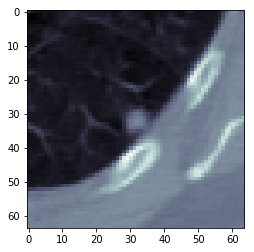

In [13]:
img = imgs[0,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")

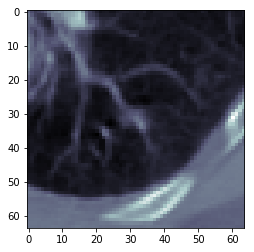

In [14]:
img = imgs[1,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")

(-0.5, 63.5, 63.5, -0.5)

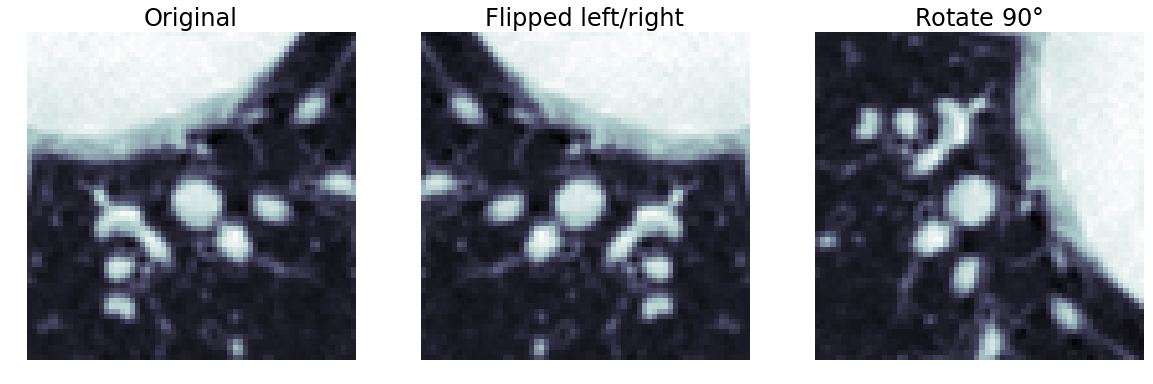

In [15]:
img = imgs[36,:]
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.title("Original", fontsize=24)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(np.flip(img.reshape(3,64,64)[1,:,:],axis=1), cmap="bone")
plt.title("Flipped left/right", fontsize=24)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.rot90(img.reshape(3,64,64)[1,:,:], k=-1), cmap="bone");
plt.title(r'Rotate $90\degree$', fontsize=24)
plt.axis("off")

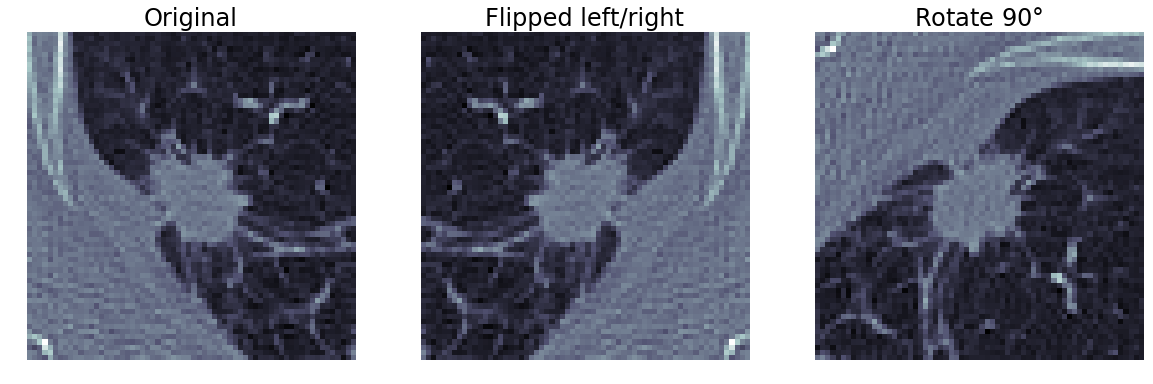

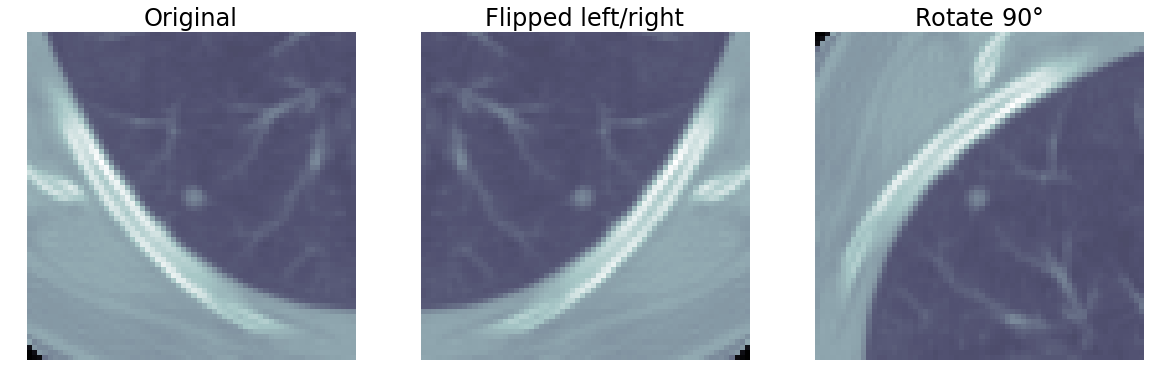

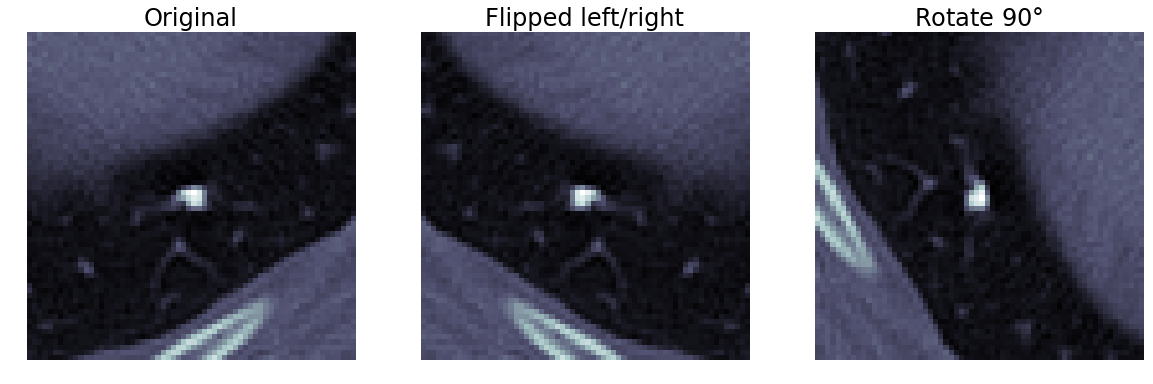

In [16]:
img = imgs[76,:]
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.title("Original", fontsize=24)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(np.flip(img.reshape(3,64,64)[1,:,:],axis=1), cmap="bone")
plt.title("Flipped left/right", fontsize=24)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.rot90(img.reshape(3,64,64)[1,:,:], k=-1), cmap="bone");
plt.title(r'Rotate $90\degree$', fontsize=24)
plt.axis("off");

img = imgs[5,:]
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.title("Original", fontsize=24)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(np.flip(img.reshape(3,64,64)[1,:,:],axis=1), cmap="bone")
plt.title("Flipped left/right", fontsize=24)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.rot90(img.reshape(3,64,64)[1,:,:], k=-1), cmap="bone");
plt.title(r'Rotate $90\degree$', fontsize=24)
plt.axis("off")

img = imgs[33,:]
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.title("Original", fontsize=24)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(np.flip(img.reshape(3,64,64)[1,:,:],axis=1), cmap="bone")
plt.title("Flipped left/right", fontsize=24)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.rot90(img.reshape(3,64,64)[1,:,:], k=-1), cmap="bone");
plt.title(r'Rotate $90\degree$', fontsize=24)
plt.axis("off");



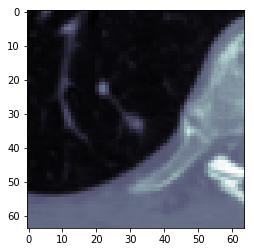

In [17]:
img = imgs[121,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")

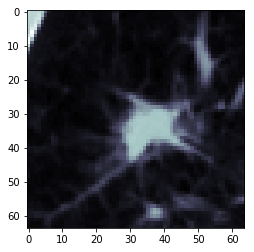

In [18]:
img = imgs[80,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")

In [19]:
imgs_reshaped = imgs.reshape(len(idx_subset_class1), 3, 64, 64, 1).swapaxes(1,3)

In [20]:
predictions = model.predict(imgs_reshaped)

In [21]:
sum(predictions > 0.5)

array([59])

In [22]:
len(predictions)

154

## Predict all subset

In [23]:
imgs = df["input"][idx_subset, :]
imgs_reshaped = imgs.reshape(len(idx_subset), 3, 64, 64, 1).swapaxes(1,3)

In [24]:
predictions = model.predict(imgs_reshaped, verbose=2)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
y_true = df["output"][idx_subset, :]

In [27]:
predictions

array([[3.0405699e-06],
       [7.7326440e-06],
       [3.0669373e-06],
       ...,
       [8.7740400e-06],
       [2.3928897e-06],
       [6.9324257e-09]], dtype=float32)

In [28]:
confusion_matrix(y_true, np.round(predictions))

array([[76483,    34],
       [   95,    59]])

In [29]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score

print("Recall = {}".format(recall_score(y_true, np.round(predictions))))
print("Precision = {}".format(precision_score(y_true, np.round(predictions))))
print("AUC = {}".format(roc_auc_score(y_true, predictions)))
      

Recall = 0.38311688311688313
Precision = 0.6344086021505376
AUC = 0.901482380029631


In [30]:
from sklearn.metrics import average_precision_score

average_precision_score(y_true, predictions)

0.37810344584553457

In [31]:
from sklearn.metrics import roc_curve, auc
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

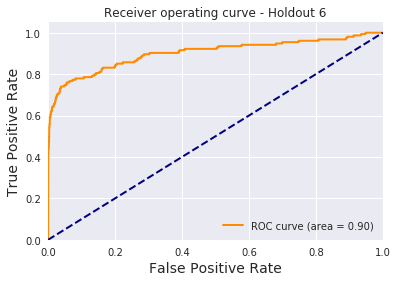

In [32]:
import seaborn as sns
sns.set()
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver operating curve - Holdout {}'.format(HOLDOUT))
plt.legend(loc="lower right")
plt.show()

In [33]:
predictions.shape

(76671, 1)

In [34]:
y_true.shape

(76671, 1)

In [35]:
bad = np.where(np.round(predictions)!=y_true)[0]

In [50]:
bad1_idx = np.where(y_true[bad] == 1)[0]

In [51]:
ii=bad[bad1_idx[0]]
y_true[ii]

array([1])

In [52]:
predictions[ii]

array([4.7349604e-06], dtype=float32)

Text(0.5,1,'Prediction = 0.00, Truth 1')

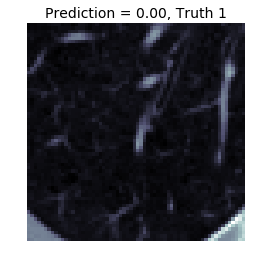

In [53]:
sns.reset_orig()
img = df["input"][ii,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.axis('off');
plt.title("Prediction = {:.2f}, Truth {}".format(predictions[ii][0], y_true[ii][0]), fontsize=14)

In [40]:
imgs.shape

(76671, 12288)

In [41]:
import pandas as pd

In [42]:
d = np.array([predictions, y_true])

In [43]:
dfp = pd.DataFrame(d[:,:,0].transpose())
dfp.columns = ["Prediction", "Truth"]

In [44]:
dfp.to_csv("predictions_truth_subset{}.csv".format(HOLDOUT))

In [45]:
dfp

,Prediction,Truth
0,3.040570e-06,0.0
1,7.732644e-06,0.0
2,3.066937e-06,0.0
3,5.366838e-06,0.0
4,1.225472e-05,0.0
5,1.419636e-06,0.0
6,2.244841e-07,0.0
7,6.632682e-07,0.0
8,1.513590e-07,0.0
9,1.197736e-06,0.0


In [46]:
df_out = pd.DataFrame((df["uuid"][idx_subset,:]).astype(str))
df_out.columns = ["seriesuid"]

df_out["coordX"] = df["centroid"][idx_subset, 0]
df_out["coordY"] = df["centroid"][idx_subset, 1]
df_out["coordZ"] = df["centroid"][idx_subset, 2]

In [47]:
df_out["probability"] = dfp["Prediction"]

In [48]:
df_out

,seriesuid,coordX,coordY,coordZ,probability
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.226564372605...,102.520000,90.020000,-11.250000,3.040570e-06
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.226564372605...,-2.530000,26.990000,-125.070000,7.732644e-06
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.226564372605...,178.860000,40.300000,-185.490000,3.066937e-06
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.226564372605...,25.490000,108.230000,-75.190000,5.366838e-06
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.226564372605...,107.420000,99.120000,-59.730000,1.225472e-05
5,1.3.6.1.4.1.14519.5.2.1.6279.6001.226564372605...,-0.430000,113.130000,-103.290000,1.419636e-06
6,1.3.6.1.4.1.14519.5.2.1.6279.6001.226564372605...,116.622544,73.325185,-125.037723,2.244841e-07
7,1.3.6.1.4.1.14519.5.2.1.6279.6001.226564372605...,33.890000,84.410000,-186.190000,6.632682e-07
8,1.3.6.1.4.1.14519.5.2.1.6279.6001.226564372605...,104.075736,70.217521,-76.340639,1.513590e-07
9,1.3.6.1.4.1.14519.5.2.1.6279.6001.226564372605...,128.440000,101.220000,-88.540000,1.197736e-06


In [49]:
df_out.to_csv("predictions_subset{}.csv".format(HOLDOUT), index=False)